In [1]:

from __future__ import print_function
import os
import sys

import numpy as np
import pandas as pd

import datetime
from math import sqrt
from math import exp
import math
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

from keras.layers import Dense,Input, Dropout
from keras.layers import LSTM
from keras.layers import Activation
from keras import optimizers
import keras.backend as K


from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
import matplotlib.pyplot as plt
from random import gauss
from random import seed
#from pandas import Series
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from random import randrange

from sklearn.cross_validation import train_test_split
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import random
from random import gauss
from random import seed
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
from scipy.stats.stats import pearsonr    


C:\Users\murat.ozemre\AppData\Local\Continuum\Anaconda3\envs\Tensor_1\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.
C:\Users\murat.ozemre\AppData\Local\Continuum\Anaconda3\envs\Tensor_1\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\murat.ozemre\AppData\Local\Continuum\Anaconda3\envs\Tensor_1\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are differen

In [2]:
from datetime import datetime
datetime.now().strftime('%m-%d %H:%M')

'04-11 14:51'

In [3]:
import Experiment_Ready as experim


In [4]:
os.getcwd()

'C:\\Users\\murat.ozemre\\Desktop\\Thesis_Project\\Data_Learning_Prediction'

In [5]:
Product_Type_Options = [841810,841840,841850]
Product=Product_Type_Options[2] #841810

Productname=Product
Exp_Country='TUR' # 'CHN'
Imp_Country='GBR'

if Exp_Country=='CHN':
    Currency='CNY'
    EXP0='TUR'   
elif Exp_Country=='TUR':
    Currency='TRY'
    EXP0='CHN'   

In [6]:
#Default values

dependenttype='same'
percent=100
MonthSeries="3"

if Exp_Country=='CHN':
        if Product==841810:
            MonthSeries="_34"
            percent=50
            dependenttype='same'
        elif Product==841840:
            MonthSeries="_345"
            percent=50
            dependenttype='log'
        elif Product==841850:
            MonthSeries="_34"
            percent=100
            dependenttype='log'
elif Exp_Country=='TUR':
        if Product==841810:
            MonthSeries="_67"
            percent=50
            dependenttype='same'
        elif Product==841840:
            MonthSeries="4"
            percent=50
            dependenttype='same'
        elif Product==841850:
            MonthSeries="_45"
            percent=50
            dependenttype='same'

print(Exp_Country)





TUR


In [7]:
os.chdir('..')
os.chdir('Data_Sources_and_Preparation')

Data_Core1 = pd.ExcelFile('Data_{}_{}_{}.xlsx'.format(Exp_Country,Imp_Country,Product))
y = Data_Core1.parse('Y', header=0,index_col=None, na_values=['NA'])['{}_{}_{}'.format(Exp_Country,Imp_Country,Product)]
Z = Data_Core1.parse('Y', header=0,index_col=None, na_values=['NA'])[['Date','Year','Month']]

X = Data_Core1.parse('X{}'.format(MonthSeries), header=0,index_col=None, na_values=['NA'])
X.drop(['Date','Year','Month'], axis=1, inplace=True)
X_Column_Names=list(X.columns.values)
n_feature=X.shape[1]

#y=y.iloc[3:]
#X=X.iloc[3:,:]
#Z=Z.iloc[3:,:]

Xhat = Data_Core1.parse('Xhat', header=0,index_col=None, na_values=['NA'])
Xhat.drop(['Date','Year','Month'], axis=1, inplace=True)




In [8]:
if dependenttype=='same':
    dependent_variable=y
elif dependenttype=='log':
    dependent_variable=y.apply(np.log)
elif dependenttype=='sqrt':
    dependent_variable=y.apply(np.sqrt)

In [9]:
# Calculate Feature Importace according Month Series
number_of_split_for_feature=100
result=experim.get_feature_importance_result (X,dependent_variable,Z,n_feature,number_of_split_for_feature)
scored_feature_indices=result[0]
feature_score=result[1]

In [10]:
# Omit Features according percentage
percentile=100-percent
threshold_for_feature_selection=np.percentile(feature_score[scored_feature_indices], percentile)
X_threshold=X.iloc[:,scored_feature_indices[feature_score[scored_feature_indices]>threshold_for_feature_selection]]
  

In [11]:
scored_feature_indices

array([ 1,  3, 14, 15, 10, 13, 47, 41,  8, 38, 16, 17, 27, 36, 31, 33,  7,
       32, 35, 43,  4, 29, 44, 40, 19, 37, 39,  5,  9, 42, 11,  0, 45, 28,
        2, 12, 26, 21,  6, 34, 50, 22, 49, 54, 30, 48, 55, 46, 20, 51, 18,
       53, 25, 24, 52, 23], dtype=int64)

In [12]:
# Set X train, X test, y train, y test
rs=42 # 841810 -3

Scaled_Train_Test_Split=experim.X_Y_scaler_train_test_Split(X_threshold,dependent_variable,Z,random=rs)

X_train = Scaled_Train_Test_Split[0].values
X_test = Scaled_Train_Test_Split[1].values
y_train = Scaled_Train_Test_Split[2].values
y_test = Scaled_Train_Test_Split[3].values
scaler_X = Scaled_Train_Test_Split[4]  
scaler_y = Scaled_Train_Test_Split[5]
scaled_value_X=Scaled_Train_Test_Split[6]
scaled_value_y=Scaled_Train_Test_Split[7]

In [13]:
experim.experiment_RandomForest(10,
                  X_train, X_test, y_train, y_test,scaler_y,
                                rand=20,is_random_fixed='FALSE',dependenttype=dependenttype)


randomforest rs= 97
randomforest rs= 72
randomforest rs= 100
randomforest rs= 22
randomforest rs= 75
randomforest rs= 76
randomforest rs= 64
randomforest rs= 15
randomforest rs= 21
randomforest rs= 53


([0.769, 0.764, 0.714, 0.714, 0.652, 0.521, 0.62, 0.518, 0.683, 0.772],
 [0.769, 0.764, 0.714, 0.714, 0.652, 0.521, 0.62, 0.518, 0.683, 0.772])

In [14]:
#TUR 841840 RS =43
experim.experiment_RandomForest(2,
                  X_train, X_test, y_train, y_test,scaler_y,est=3000,rand=43,dependenttype=dependenttype)

randomforest rs= 43
randomforest rs= 43


([0.851, 0.851], [0.851, 0.851])

# LSTM EXPERIMENT (with fixed split set) SECTION

In [15]:
os.chdir('..')
os.chdir('Data_Learning_Prediction/Plots_for_LSTM')


In [17]:
# LSTM EXPERIMENT

#def experiment(repeats,n_epochs,n_neurons,learning_rate,bs,rs,X,y,date):
def experiment_LSTM(repeats,n_epochs,n_neurons,learning_rate,bs,drop_rate,do_batch,do_model,train_X, test_X, train_y, test_y,scaler_x,scaler_y):
    K.clear_session()

#    print(type(train_X))
    train_X =train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

#    train_X =train_X.reshape((train_X.shape[0], train_X.shape[1],1))
#    test_X = test_X.reshape((test_X.shape[0], test_X.shape[1],1))
#    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
    
    error_rmse = list()
    error_r2hat = list()
    error_r2 = list()
    for r in range(repeats):
        
        print('Shape of X Train',train_X.shape[1],train_X.shape[2])
    

        if do_model=='A':
            model = Sequential() 
            model.add(LSTM(n_neurons,input_shape=(train_X.shape[1], train_X.shape[2])))
            model.add(Dropout(drop_rate))
            
            model.add(Dense(n_neurons))
            model.add(Dropout(drop_rate))
            
            model.add(Dense(1))
#            model.add(Activation('sigmoid'))
            model.add(Activation('linear'))
        
        elif do_model=='B':   
            input_layer=Input(shape=(train_X.shape[1], train_X.shape[2]),dtype='float32')
            lstm_layer1=LSTM(n_neurons,input_shape=(train_X.shape[1],train_X.shape[2]),
                         dropout=drop_rate, 
                         recurrent_dropout=drop_rate,
                         return_sequences=True)(input_layer)
            lstm_layer2=LSTM(n_neurons,input_shape=(train_X.shape[1],n_neurons),
                         dropout=drop_rate, 
                         recurrent_dropout=drop_rate,
                         return_sequences=False)(lstm_layer1)
            dropout_layer=Dropout(drop_rate)(lstm_layer2)

            output_layer=Dense(1,activation="linear")(dropout_layer)
#            output_layer=Dense(1,activation="linear")(lstm_layer2)
         

        #ix layerlarda Activation için RELU Output için linear uygun oluyor. Kaynak Siraj Raval
        
            model=Model(inputs=input_layer, outputs=output_layer)
        
        
        #decay_rate = learning_rate / n_epochs
        
        decay_rate = 0.8
        momentum = 0.9
         
        sgd = optimizers.SGD(lr=learning_rate, clipvalue=0.3,momentum=momentum, decay=decay_rate,nesterov=True)
        adam = optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=decay_rate, amsgrad=False)

        #model.compile(loss='mean_squared_error', optimizer='adam')
        
        
#        model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
        model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])

#        model=load_model(os.path.join('Data','train_dataset{}-{}neurons.hdf5'.format(Productname,n_neurons)))
#        model=load_model(os.path.join('Data','train_dataset{}-{}neurons.hdf5'.format(Productname,n_neurons)))

        model.summary()
        
        save_weights_at=os.path.join('Data','train_dataset{}-{}neurons.hdf5'.format(Productname,n_neurons))

        save_best=ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                                 save_best_only=True, save_weights_only=False, mode='min',
                                 period=1)
        
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.00001)
        early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)
        
        history = model.fit(train_X, train_y, epochs=n_epochs, batch_size=bs, 

                            validation_data=(test_X, test_y), verbose=1, 
#                            callbacks=[reduce_lr],
                           # callbacks=[save_best],

                           # callbacks=[early_stop],
                            shuffle=False)

#        best_model=load_model(os.path.join('Data','train_dataset.hdf5')
#        model=load_model(os.path.join('Data','train_dataset{}-{}neurons.hdf5'.format(Productname,n_neurons)))

        #model=best_model

        
        

        
        # summarize history for loss
        plt.gcf().clear()
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

        
        # summarize history for accuracy
#        plt.plot(history.history['acc'])
#        plt.plot(history.history['val_acc'])
#        plt.title('model accuracy')
#        plt.ylabel('accuracy')
#        plt.xlabel('epoch')
#        plt.legend(['train', 'test'], loc='upper left')
#        plt.show()


#        test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[1]))

        test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[2]))
        inv_x_test = scaler_x.inverse_transform(test_X_reshaped)
        inv_x_test = pd.DataFrame(data=inv_x_test[:,:])

        # make a prediction
        y_predict_test = model.predict(test_X)
        y_predict_train = model.predict(train_X)

        # invert scaling for forecast
        inv_y_predict_test = scaler_y.inverse_transform(y_predict_test)
        inv_y_predict_test = inv_y_predict_test[:,0]
        inv_y_predict_train = scaler_y.inverse_transform(y_predict_train)
        inv_y_predict_train = inv_y_predict_train[:,0]

        # invert scaling for actual
        y_test = test_y.reshape((len(test_y), 1))
        inv_y_test = scaler_y.inverse_transform(test_y)
        inv_y_test = inv_y_test[:,0]

        y_train = train_y.reshape((len(train_y), 1))
        inv_y_train = scaler_y.inverse_transform(train_y)
        inv_y_train = inv_y_train[:,0]

        # calculate RMSE for DIFFERENCE
        rmse_test = sqrt(mean_squared_error(inv_y_test, inv_y_predict_test))
        print('Test RMSE: %.3f' % rmse_test)
        R2_test=int(1000*(metrics.r2_score(inv_y_test, inv_y_predict_test)))/1000
        print('R2_test: %.3f' % R2_test)

        rmse_train = sqrt(mean_squared_error(inv_y_train, inv_y_predict_train))
        print('Train RMSE: %.3f' % rmse_train)
        R2_train=int(1000*(metrics.r2_score(inv_y_train, inv_y_predict_train)))/1000
        print('R2_train: %.3f' % R2_train)

        # calculate RMSE for REAL VALUE

        real_y_test= inv_x_test.iloc[:,0]+inv_y_test
        real_y_predict_test=inv_x_test.iloc[:,0]+inv_y_predict_test
        
        real_rmse_test = sqrt(mean_squared_error(real_y_test, real_y_predict_test))
        print('Test RMSE: %.3f' % real_rmse_test)
        real_R2_test=int(1000*(metrics.r2_score(real_y_test, real_y_predict_test)))/1000
        print('R2_test: %.3f' % real_R2_test)
        
        error_rmse.append(real_rmse_test)
        error_r2hat.append(real_R2_test)
        error_r2.append(R2_test)
        
        
        plt.gcf().clear()
        plt.figure(figsize=(5.5, 5.5))
        plt.plot(range(len(inv_y_test)), inv_y_test, linestyle='-', marker='*', color='r')
        plt.plot(range(len(inv_y_predict_test)), inv_y_predict_test, linestyle='-', marker='.', color='b')
        plt.legend(['Actual','Predicted'], loc=2)
        plt.title('Actual vs Predicted for {}'.format(Productname))
        plt.ylabel('Trade Value')
        plt.xlabel('Index')
        plt.savefig('LSTM-LinePlt{} ,{} epochs,{} neurons,{} learning_rate,{} batch size, {} random, {} R2.png'.format(Productname,
                                n_epochs,n_neurons,learning_rate,bs,rs,R2_test), format='png', dpi=300)
       

        
        
    return error_rmse,error_r2,error_r2hat,train_y,history

(115, 1, 28) (115, 1) (29, 1, 28) (29, 1)
Shape of X Train 1 28
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 28)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 300)            394800    
_________________________________________________________________
lstm_2 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 301       
Total params: 1,116,301
Trainable params: 1,116,301
Non-trainable params: 0
_________________________________________________________________
Train on 115 samples, validate on 29 samples
Epoch 1/200
115/115 [==

115/115 [==============================] - 5s 40ms/step - loss: 0.0323 - acc: 0.0087 - val_loss: 0.0331 - val_acc: 0.0000e+00
Epoch 53/200
115/115 [==============================] - 5s 40ms/step - loss: 0.0322 - acc: 0.0087 - val_loss: 0.0331 - val_acc: 0.0000e+00
Epoch 54/200
115/115 [==============================] - 4s 38ms/step - loss: 0.0322 - acc: 0.0087 - val_loss: 0.0331 - val_acc: 0.0000e+00
Epoch 55/200
115/115 [==============================] - 4s 39ms/step - loss: 0.0322 - acc: 0.0087 - val_loss: 0.0331 - val_acc: 0.0000e+00
Epoch 56/200
115/115 [==============================] - 4s 39ms/step - loss: 0.0322 - acc: 0.0087 - val_loss: 0.0331 - val_acc: 0.0000e+00
Epoch 57/200
115/115 [==============================] - 5s 40ms/step - loss: 0.0322 - acc: 0.0087 - val_loss: 0.0330 - val_acc: 0.0000e+00
Epoch 58/200
115/115 [==============================] - 4s 38ms/step - loss: 0.0322 - acc: 0.0087 - val_loss: 0.0330 - val_acc: 0.0000e+00
Epoch 59/200
115/115 [==================

Epoch 111/200
115/115 [==============================] - 4s 37ms/step - loss: 0.0319 - acc: 0.0087 - val_loss: 0.0325 - val_acc: 0.0000e+00
Epoch 112/200
115/115 [==============================] - 5s 39ms/step - loss: 0.0319 - acc: 0.0087 - val_loss: 0.0325 - val_acc: 0.0000e+00
Epoch 113/200
115/115 [==============================] - 5s 39ms/step - loss: 0.0319 - acc: 0.0087 - val_loss: 0.0325 - val_acc: 0.0000e+00
Epoch 114/200
115/115 [==============================] - 4s 38ms/step - loss: 0.0319 - acc: 0.0087 - val_loss: 0.0325 - val_acc: 0.0000e+00
Epoch 115/200
115/115 [==============================] - 4s 38ms/step - loss: 0.0319 - acc: 0.0087 - val_loss: 0.0325 - val_acc: 0.0000e+00
Epoch 116/200
115/115 [==============================] - 4s 39ms/step - loss: 0.0319 - acc: 0.0087 - val_loss: 0.0325 - val_acc: 0.0000e+00
Epoch 117/200
115/115 [==============================] - 4s 39ms/step - loss: 0.0319 - acc: 0.0087 - val_loss: 0.0325 - val_acc: 0.0000e+00
Epoch 118/200
115/11

115/115 [==============================] - 5s 39ms/step - loss: 0.0318 - acc: 0.0087 - val_loss: 0.0322 - val_acc: 0.0000e+00
Epoch 170/200
115/115 [==============================] - 4s 37ms/step - loss: 0.0318 - acc: 0.0087 - val_loss: 0.0322 - val_acc: 0.0000e+00
Epoch 171/200
115/115 [==============================] - 4s 39ms/step - loss: 0.0318 - acc: 0.0087 - val_loss: 0.0322 - val_acc: 0.0000e+00
Epoch 172/200
115/115 [==============================] - 5s 41ms/step - loss: 0.0318 - acc: 0.0087 - val_loss: 0.0322 - val_acc: 0.0000e+00
Epoch 173/200
115/115 [==============================] - 5s 39ms/step - loss: 0.0318 - acc: 0.0087 - val_loss: 0.0322 - val_acc: 0.0000e+00
Epoch 174/200
115/115 [==============================] - 4s 38ms/step - loss: 0.0317 - acc: 0.0087 - val_loss: 0.0322 - val_acc: 0.0000e+00
Epoch 175/200
115/115 [==============================] - 5s 40ms/step - loss: 0.0317 - acc: 0.0087 - val_loss: 0.0322 - val_acc: 0.0000e+00
Epoch 176/200
115/115 [===========

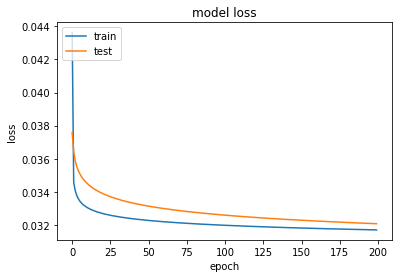

Test RMSE: 960.921
R2_test: 0.320
Train RMSE: 955.168
R2_train: 0.157
Test RMSE: 960.921
R2_test: 0.991
[0.32]
[0.991]


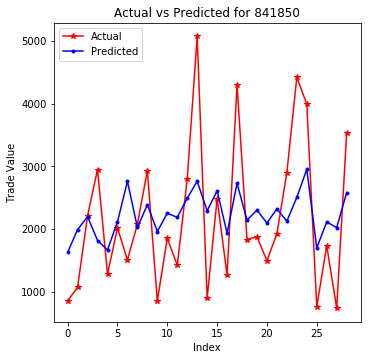

In [18]:
#rs=29
rs=42
repeats = 1
drop_rate=0.0

do_batch='TRUE'
do_model='B'
random_split='TRUE'

e=200
n=300
lr=0.01
b=1

deney=experiment_LSTM(repeats,e,n,lr,b,drop_rate,do_batch,do_model,X_train, X_test, y_train, y_test,scaler_X,scaler_y)

error_rmse=deney[0] 
error_r2=deney[1] 
error_r2hat=deney[2] 
train_y=deney[3]
history=deney[4]
print(error_r2)
print(error_r2hat)